<a href="https://colab.research.google.com/github/abidur0177/Convolutional_Neural_Network/blob/main/Cat_Dog_Classification_With_CNN_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project I have defined a convolutional neural network to distinguish between cat and dog images. This is a binary classification task in nature and the dataset is much larger than the horse_or_human classification. To avoid the overfitting problem, I will use data augmentation and compare the result with the typical CNN classification.

### First import some basic libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Download the cats and dogs images with 3000 samples where 2000 will be allocated for training and 1000 will be for testing.

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-05-04 01:03:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.207, 64.233.180.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   150MB/s    in 0.4s    

2024-05-04 01:03:34 (150 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



### Unzip the file to a folder

In [3]:
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall()
ref_zip.close()

### Lets look at the directories inside the base directory

In [4]:
import os

base_dir = '/content/cats_and_dogs_filtered'

print(f'Sub directories of base directory: {os.listdir(base_dir)}')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print('Sub directories of train directory:', os.listdir(train_dir))
print('Sub directories of validation directory:', os.listdir(val_dir))

train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')
val_cat_dir = os.path.join(val_dir,'cats')
val_dog_dir = os.path.join(val_dir,'dogs')

print('Number of cat samples in train directory: ', len(os.listdir(train_cat_dir)))
print('Number of dog samples in train directory: ', len(os.listdir(train_dog_dir)))
print('Number of cat samples in validation directory: ', len(os.listdir(val_cat_dir)))
print('Number of dog samples in validation directory: ', len(os.listdir(val_dog_dir)))

Sub directories of base directory: ['train', 'vectorize.py', 'validation']
Sub directories of train directory: ['dogs', 'cats']
Sub directories of validation directory: ['dogs', 'cats']
Number of cat samples in train directory:  1000
Number of dog samples in train directory:  1000
Number of cat samples in validation directory:  500
Number of dog samples in validation directory:  500


### Print some of the sample files from every directory.

In [5]:
train_cat_names = os.listdir(train_cat_dir)
train_dog_names = os.listdir(train_dog_dir)
val_cat_names = os.listdir(val_cat_dir)
val_dog_names = os.listdir(val_dog_dir)

print(f'Train Cats: {train_cat_names[:5]}')
print(f'Train dogs: {train_dog_names[:5]}')
print(f'Validation Cats: {val_cat_names[:5]}')
print(f'Validation Cats: {val_dog_names[:5]}')

Train Cats: ['cat.177.jpg', 'cat.129.jpg', 'cat.176.jpg', 'cat.386.jpg', 'cat.831.jpg']
Train dogs: ['dog.69.jpg', 'dog.666.jpg', 'dog.661.jpg', 'dog.520.jpg', 'dog.286.jpg']
Validation Cats: ['cat.2434.jpg', 'cat.2234.jpg', 'cat.2375.jpg', 'cat.2489.jpg', 'cat.2356.jpg']
Validation Cats: ['dog.2155.jpg', 'dog.2496.jpg', 'dog.2233.jpg', 'dog.2333.jpg', 'dog.2078.jpg']


### Lets look at some of the images from both class

/bin/bash: line 1: matplotlib: command not found


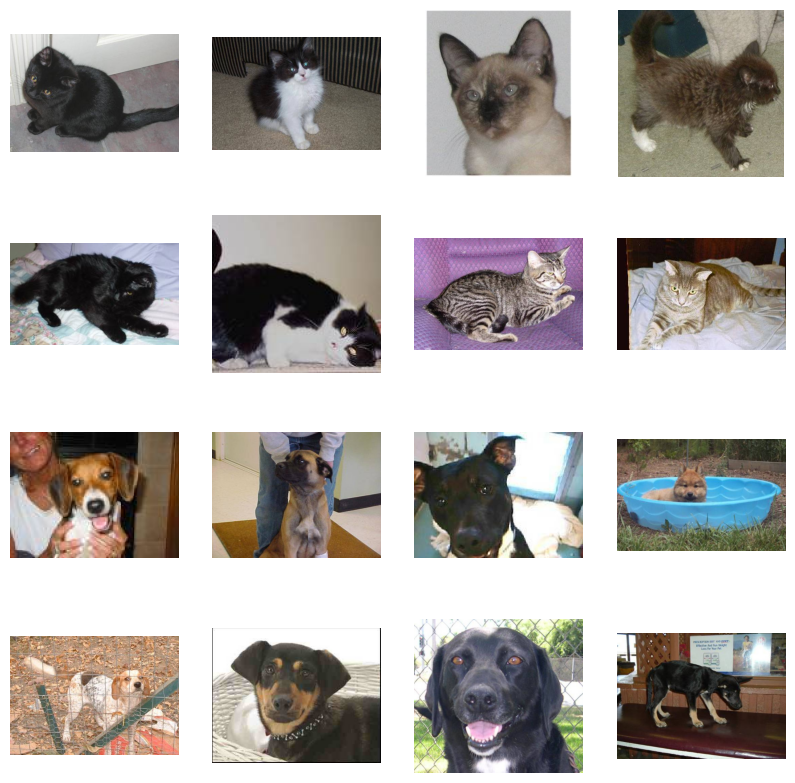

In [6]:
!matplotlib inline
import matplotlib.image as mping

n_rows = 4
n_cols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(n_cols*2.5, n_rows*2.5)

cat_pics = [os.path.join(train_cat_dir, fname) for fname in train_cat_names[pic_index:pic_index+8]]
dog_pics = [os.path.join(train_dog_dir,fname) for fname in train_dog_names[pic_index:pic_index+8]]

for i, image_path in enumerate(cat_pics+dog_pics):
  sp = plt.subplot(n_cols, n_rows, i+1)
  sp.axis('off')
  img = mping.imread(image_path)
  plt.imshow(img)

plt.show()

### Define the model and compile with RMSprop

In [7]:
from keras.optimizers import RMSprop

def my_model(conv1,conv2,conv3, conv4, pool1,pool2,pool3, pool4,dense1,dense2):
  model = keras.models.Sequential([
      #First convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #First pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Second convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #Second pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Third convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #Third pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Fourth convolution layer
      keras.layers.Conv2D(conv1['No of filters'], conv1['Size of filters'],
                          activation=tf.nn.relu, input_shape=(150,150,3)),
      #Fourth pooling layer
      keras.layers.MaxPool2D(pool1['Size']),
      #Flatten layer
      keras.layers.Flatten(),
      #First dense layer
      keras.layers.Dense(dense1['No of neurons'], activation=tf.nn.relu),
      #Output layer
      keras.layers.Dense(dense2['No of neurons'], activation=tf.nn.sigmoid)
  ])

  model_compile = model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(),
      optimizer=RMSprop(learning_rate=0.001),
      metrics=keras.metrics.Accuracy())

  return model, model_compile

In [8]:
conv1 = {
    "No of filters": 32,
    "Size of filters": (3,3)
}

conv2 = {
    "No of filters": 64,
    "Size of filters": (3,3)
}

conv3 = {
    "No of filters": 128,
    "Size of filters": (3,3)
}
conv4 = {
    "No of filters": 128,
    "Size of filters": (3,3)
}

pool1 = {
    "Size": (2,2)
}

pool2 = {
    "Size": (2,2)
}

pool3 = {
    "Size": (2,2)
}
pool4 = {
    "Size": (2,2)
}

dense1 = {
    "No of neurons": 512
}

dense2 = {
    "No of neurons": 1
}

model, model_compile = my_model(conv1, conv2, conv3, conv4, pool1, pool2 ,pool3, pool4, dense1, dense2)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

### Preprocess the images with ImageDataGenerator

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255)
validation_gen = ImageDataGenerator(rescale=1.0/255)

#Flow of traning image in batches of 20 from the train directory
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

#Flow of traning image in batches of 20 from the validation directory
validation_generator = train_gen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model with the training data for 10 epochs

In [19]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 67s - loss: 0.6077 - accuracy: 0.0000e+00 - val_loss: 0.5858 - val_accuracy: 0.0000e+00 - 67s/epoch - 666ms/step
Epoch 2/20
100/100 - 63s - loss: 0.5693 - accuracy: 0.0000e+00 - val_loss: 0.5734 - val_accuracy: 0.0000e+00 - 63s/epoch - 634ms/step
Epoch 3/20
100/100 - 58s - loss: 0.5339 - accuracy: 0.0000e+00 - val_loss: 0.5647 - val_accuracy: 0.0000e+00 - 58s/epoch - 584ms/step
Epoch 4/20
100/100 - 59s - loss: 0.4931 - accuracy: 0.0000e+00 - val_loss: 0.5577 - val_accuracy: 0.0000e+00 - 59s/epoch - 592ms/step
Epoch 5/20
100/100 - 56s - loss: 0.4580 - accuracy: 0.0000e+00 - val_loss: 0.5807 - val_accuracy: 0.0000e+00 - 56s/epoch - 558ms/step
Epoch 6/20
100/100 - 54s - loss: 0.4035 - accuracy: 0.0000e+00 - val_loss: 0.5859 - val_accuracy: 0.0000e+00 - 54s/epoch - 543ms/step
Epoch 7/20
100/100 - 55s - loss: 0.3597 - accuracy: 0.0000e+00 - val_loss: 0.5837 - val_accuracy: 0.0000e+00 - 55s/epoch - 552ms/step
Epoch 8/20
100/100 - 54s - loss: 0.3229 - accuracy: 0.0000e+00

### Evaluate accuracy and loss of the model

In [1]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

# Plot training results
plot_loss_acc(history)

NameError: name 'history' is not defined

### Now I will perform data augmentation to the training data

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 67s - loss: 0.6783 - accuracy: 0.0030 - val_loss: 0.5940 - val_accuracy: 0.0000e+00 - 67s/epoch - 670ms/step
Epoch 2/20
100/100 - 66s - loss: 0.6019 - accuracy: 0.0000e+00 - val_loss: 0.5033 - val_accuracy: 0.0000e+00 - 66s/epoch - 659ms/step
Epoch 3/20
100/100 - 67s - loss: 0.5771 - accuracy: 0.0000e+00 - val_loss: 0.5295 - val_accuracy: 0.0000e+00 - 67s/epoch - 666ms/step
Epoch 4/20
100/100 - 65s - loss: 0.5671 - accuracy: 0.0000e+00 - val_loss: 0.5650 - val_accuracy: 0.0000e+00 - 65s/epoch - 654ms/step
Epoch 5/20
100/100 - 67s - loss: 0.5610 - accuracy: 0.0000e+00 - val_loss: 0.5101 - val_accuracy: 0.0020 - 67s/epoch - 671ms/step
Epoch 6/20
100/100 - 66s - loss: 0.5614 - accuracy: 5.0000e-04 - val_loss: 0.4729 - val_accuracy: 0.0000e+00 - 66s/epoch - 657ms/step
Epoch 7/20
100/100 - 66s - loss: 0.5691 - accuracy: 0.0010 - val_loss: 0.4734 - val_accuracy: 0.0000e+00 - 66s/epoch - 6

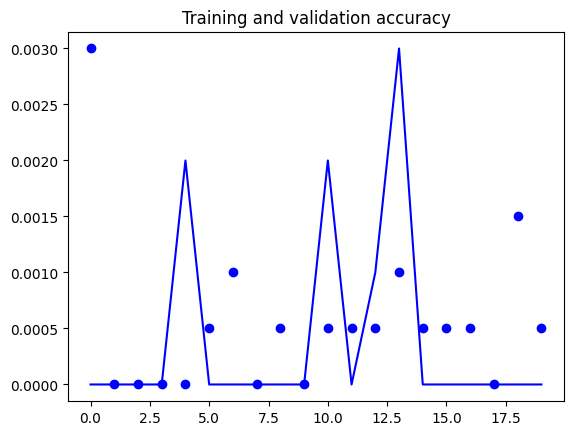

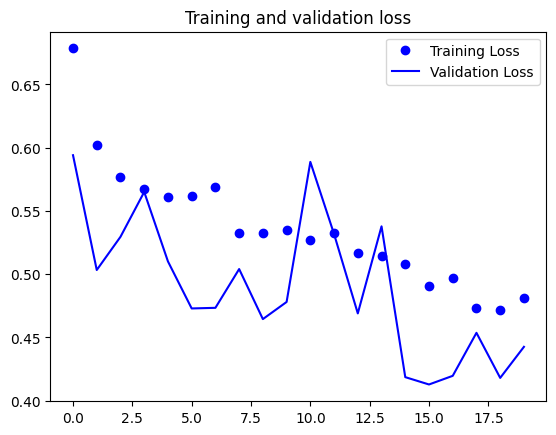

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

### Clean up

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)